# SI 618: Data Manipulation and Analysis
## 05 - Applied Statistics I

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

Version 2023.09.27.1.CT

## Correlation and Regression
### Wine quality

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

Warnings usually just cause us unnessary stress. The next code block silences warnings. 
 

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv(
    "https://raw.githubusercontent.com/umsi-data-science/data/main/winequality-red.csv"
)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1: List the 5 largest correlations in the wine quality dataset

Feeling ambitious?  Try to get the following output:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>var1</th>
      <th>var2</th>
      <th>corr</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12</th>
      <td>fixed acidity</td>
      <td>pH</td>
      <td>-0.682978</td>
    </tr>
    <tr>
      <th>14</th>
      <td>citric acid</td>
      <td>fixed acidity</td>
      <td>0.671703</td>
    </tr>
    <tr>
      <th>16</th>
      <td>density</td>
      <td>fixed acidity</td>
      <td>0.668047</td>
    </tr>
    <tr>
      <th>18</th>
      <td>free sulfur dioxide</td>
      <td>total sulfur dioxide</td>
      <td>0.667666</td>
    </tr>
    <tr>
      <th>20</th>
      <td>citric acid</td>
      <td>volatile acidity</td>
      <td>-0.552496</td>
    </tr>
  </tbody>
</table>

In [4]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [5]:
t = wine.corr()
t = t.stack().reset_index()
t.columns = ["var1", "var2", "corr"]
t = t[t["var1"] != t["var2"]]
t = t.sort_values("corr", ascending=False, key=abs)
t = t.reset_index(drop=True)
t = t.iloc[::2]
t.head()

,var1,var2,corr
0,pH,fixed acidity,-0.682978
2,citric acid,fixed acidity,0.671703
4,density,fixed acidity,0.668047
6,free sulfur dioxide,total sulfur dioxide,0.667666
8,volatile acidity,citric acid,-0.552496


Insert your answer here.

### Q2: Create a JointGrid-based plot that contains a regplot and a histplot for "free sulphur dioxide" vs. "total sulphur dioxide".

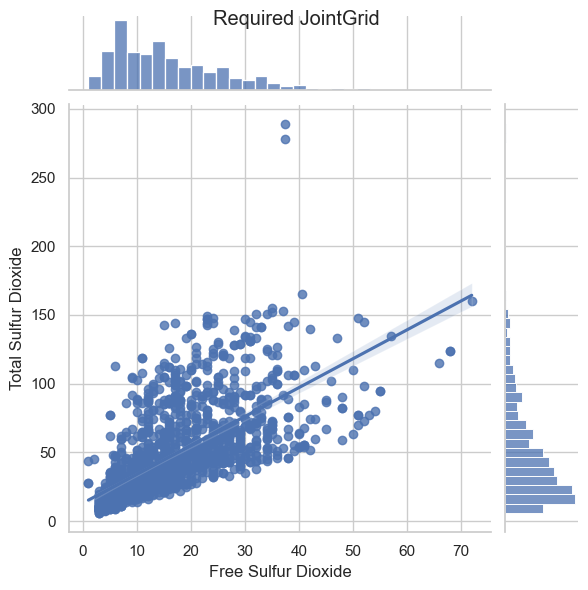

In [6]:
sns.set(style="whitegrid")

g = sns.JointGrid(data=wine, x="free sulfur dioxide", y="total sulfur dioxide")

sns.regplot(
    data=wine, x="free sulfur dioxide", y="total sulfur dioxide", ax=g.ax_joint
)
sns.histplot(data=wine, x="free sulfur dioxide", ax=g.ax_marg_x)
sns.histplot(data=wine, y="total sulfur dioxide", ax=g.ax_marg_y)

g.set_axis_labels("Free Sulfur Dioxide", "Total Sulfur Dioxide")
g.fig.suptitle("Required JointGrid")

plt.show()

## Ordinary Least Squares (OLS) Regression

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Remember that statsmodels uses R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

### Q3: Create a regression model with "total sulfur dioxide" as the dependent variable and "free sulfur dioxide" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60.

In [18]:
model0 = smf.ols(
    " Q('total sulfur dioxide') ~ Q('free sulfur dioxide')", data=wine
).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('total sulfur dioxide')   R-squared:                       0.446
Model:                                   OLS   Adj. R-squared:                  0.445
Method:                        Least Squares   F-statistic:                     1285.
Date:                       Thu, 28 Sep 2023   Prob (F-statistic):          6.40e-207
Time:                               14:09:33   Log-Likelihood:                -7382.4
No. Observations:                       1599   AIC:                         1.477e+04
Df Residuals:                           1597   BIC:                         1.478e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.1354      1.114     11.795      0.000      10.951      15.320
Q('free sulfur dioxide')     2.0997      0.059     35.840      0.000       1.985       2.215
==============================================================================
Omnibus:                      621.223   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3163.294
Skew:                           1.767   Prob(JB):                         0.00
Kurtosis:                       8.915   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
fs = 60
ts = 2.0997 * fs + 13.1354
ts

139.1174

We would estimate that the total sulfur would be 139.1174 when the free sulfur is 60, based on the regression of the data.



Exercise: Putting our ideas together

Download the Szeged weather dataset from https://www.kaggle.com/datasets/budincsevity/szeged-weather

1. Create a regression model with "apparent temperature" as the dependent variable and "temperature" as the predictor variable.
Report the following:
    1. Coefficient of determination (i.e. $r^2$)
    2. Whether the regression is statistically significant
    3. An estimate for the value of "apparent temperature" when the value of "temperature" is 10.


2. Create a regression model with "apparent temperature" as the dependent variable and "temperature" and "humidity" as the predictor variables.
Report the following:
    1. Coefficient of determination (i.e. $r^2$)
    2. Whether the regression is statistically significant
    3. An estimate for the value of "apparent temperature" when the value of "temperature" is 10 and "humidity" is 0.5.

Use as many code and markdown cells as you need to answer the questions.

In [36]:
weather = pd.read_csv("../data/weatherHistory.csv")

In [33]:
weather_model = smf.ols(
    "Q('Apparent Temperature (C)') ~ Q('Temperature (C)')", data=weather
).fit()
weather_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q('Apparent Temperature (C)')   R-squared:                       0.985
Model:                                       OLS   Adj. R-squared:                  0.985
Method:                            Least Squares   F-statistic:                 6.470e+06
Date:                           Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                                   14:27:28   Log-Likelihood:            -1.6190e+05
No. Observations:                          96453   AIC:                         3.238e+05
Df Residuals:                              96451   BIC:                         3.238e+05
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4100      0.007   -360.775      0.000      -2.423      -2.397
Q('Temperature (C)')     1.1117      0.000   2543.612      0.000       1.111       1.113
==============================================================================
Omnibus:                     4226.905   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5588.617
Skew:                          -0.449   Prob(JB):                         0.00
Kurtosis:                       3.763   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
temp = 10
atemp = 1.1117 * temp - 2.4100
atemp

8.706999999999999

The R-squared for temperature and apparent temperature is 0.985

We would say that the regession is statistically significant because the p-value (0.00) is less than 0.05.

At a temperature of 10 degrees, we would expect the apparent temperature to be 8.707

In [39]:
weather_model = smf.ols(
    "Q('Apparent Temperature (C)') ~ Q('Temperature (C)') * Q('Humidity')",
    data=weather,
).fit()
weather_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q('Apparent Temperature (C)')   R-squared:                       0.987
Model:                                       OLS   Adj. R-squared:                  0.987
Method:                            Least Squares   F-statistic:                 2.386e+06
Date:                           Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                                   14:33:18   Log-Likelihood:            -1.5709e+05
No. Observations:                          96453   AIC:                         3.142e+05
Df Residuals:                              96449   BIC:                         3.142e+05
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -3.0285      0.037    -81.935      0.000      -3.101      -2.956
Q('Temperature (C)')                   1.0628      0.002    646.540      0.000       1.060       1.066
Q('Humidity')                          0.5083      0.044     11.588      0.000       0.422       0.594
Q('Temperature (C)'):Q('Humidity')     0.1091      0.002     50.429      0.000       0.105       0.113
==============================================================================
Omnibus:                     2848.637   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7556.088
Skew:                          -0.029   Prob(JB):                         0.00
Kurtosis:                       4.370   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
temp = 10
humidity = 0.5
atemp = 1.0628 * temp + 0.5083 * humidity + 0.1091 * temp * humidity - 3.0285
atemp

8.399149999999999

The R-squared for temperature and apparent temperature is 0.986

We would say that the regession is statistically significant because the p-value (0.00) is less than 0.05.

At a temperature of 10 degrees and a humidity of 0.5, we would expect the apparent temperature to be 8.399

## Hypothesis testing (t-test and ANOVA)

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

For this section, we draw our inspiration from the FiveThirtyEight article "‘Straight Outta Compton’ Is The Rare Biopic Not About White Dudes" (https://fivethirtyeight.com/features/straight-outta-compton-is-the-rare-biopic-not-about-white-dudes/).  FiveThiryEight has a great habit of publishing the data
that underpin their stories and those data are available via GitHub so it's easy to 
load them into a DataFrame:

In [11]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/biopics/biopics.csv"

In [12]:
biopics = pd.read_csv(url, encoding="latin1")

In [13]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


We're interested in the 'box_office' variable, which is an oddly-formatted representation of the box-office earnings for each movie.  We're going to create a function that 
converts representations like '$56.7M' to '56700000'.  How?

Time for some regular expressions (yay!):

## Q6: Fill in the regular expression


In [49]:
import re
import numpy as np


def box_office_dollars(earnings):
    """
    Convert box office earnings strings to floats.
    """
    if earnings == "-":
        return np.nan

    earnings = earnings.lstrip("$")
    if earnings[-1] == "M":
        earnings = earnings.replace("M", "000000")
    elif earnings[-1] == "K":
        earnings = earnings.replace("K", "000")

    return float(earnings)


def box_office_dollars(earnings):
    m = re.match(r"\$([0-9.]+)([KM]?)", earnings)
    if not m:
        return np.nan
    ret = m.group(1)
    if not ret:
        return np.nan
    try:
        ret = float(ret)
    except ValueError:
        return np.nan
    if m.group(2) == "M":
        return ret * 1000000
    if m.group(2) == "K":
        return ret * 1000
    return ret


# Test out our function using assert statements
assert box_office_dollars("$1") == 1.0
assert box_office_dollars("$537K") == 537000.0
assert box_office_dollars("$1M") == 1000000.0
assert np.isnan(box_office_dollars("-"))

And apply it to our DataFrame, creating a new column called 'box_office_dollars'

In [51]:
biopics["box_office_dollars"] = biopics["box_office"].apply(box_office_dollars)

In [52]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,NaN
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,NaN
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0


## Q7: What should we do with our missing values:

In [53]:
biopics.dropna(subset=["box_office_dollars"], inplace=True)

As always, let's take a look at the distribution of our variable:


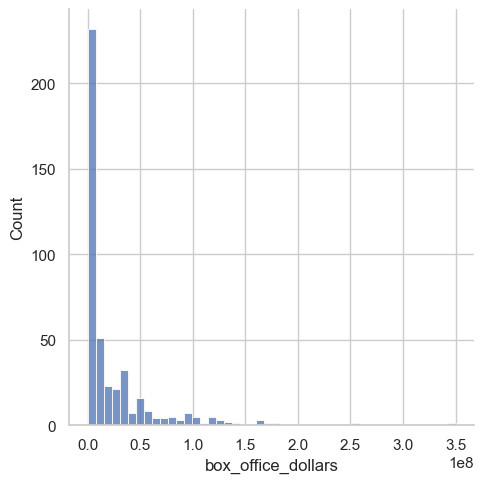

In [54]:
sns.displot(biopics["box_office_dollars"])

Hmmmm.  That doesn't look good (why?) . 

Let's see if we can make that look a bit more like a normal distribution.  Let's 
apply a log transform:

In [55]:
biopics["log_box_office_dollars"] = np.log(biopics["box_office_dollars"])

In [56]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars,log_box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0,17.853285
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0,16.722412
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0,13.193753
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0,18.212426
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0,13.937728


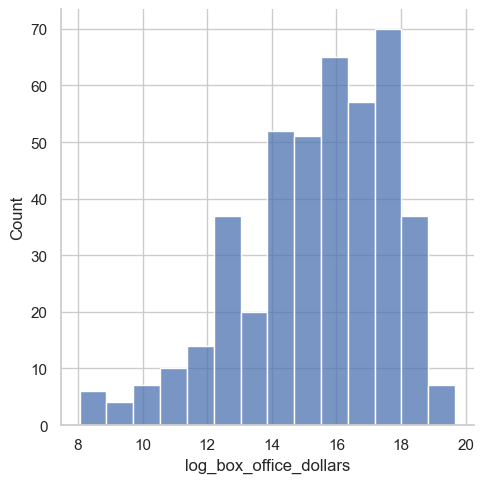

In [57]:
sns.displot(biopics["log_box_office_dollars"])

## Q8a: Use a boxplot to look at the relationship of log(box_office_dollars) and whether the subject of the biopic was a person of color or not

In [58]:
biopics.person_of_color.value_counts()

person_of_color
0    361
1     76
Name: count, dtype: int64

<Axes: xlabel='person_of_color', ylabel='log_box_office_dollars'>

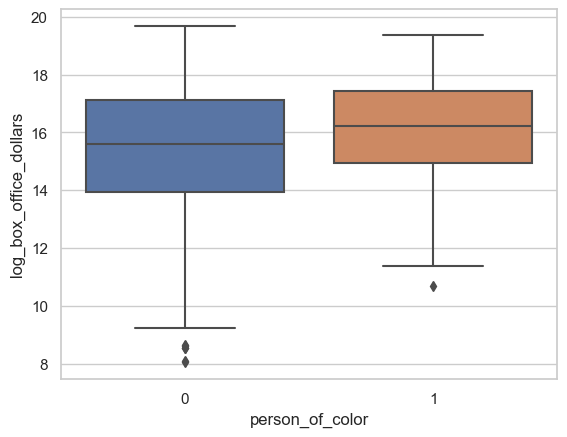

In [59]:
sns.boxplot(data=biopics, x="person_of_color", y="log_box_office_dollars")

## Q8b: Does it look like there's a difference between the two groups?

Yes, it looks like there is a difference between the two groups. The median for the box office dollars for the people of color is higher than the median for the box office dollars for the people who are not of color. Additionally, the standard deviation for peopole of colors is smaller than that of people who are not of color.

## Q9: Conduct an ANOVA to determine if there are statistically significant differences between the two groups.

In [61]:
model = ols("log_box_office_dollars ~ C(person_of_color)", data=biopics).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_box_office_dollars   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     4.127
Date:                    Thu, 28 Sep 2023   Prob (F-statistic):             0.0428
Time:                            15:25:19   Log-Likelihood:                -984.42
No. Observations:                     437   AIC:                             1973.
Df Residuals:                         435   BIC:                             1981.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  15.2572      0.121    125.644      0.000      15.018      15.496
C(person_of_color)[T.1]     0.5915      0.291      2.031      0.043       0.019       1.164
==============================================================================
Omnibus:                       34.714   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.072
Skew:                          -0.745   Prob(JB):                     1.21e-09
Kurtosis:                       3.182   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The data is statistically significant because the p-value is less than 0.05. We are able to reject the null hypothesis that there is no effect of person of color on box office dollars. 



## The t-test

To test of there's a statistically significant difference between two means, we
can use the independent sample t-test.  First, load up the right package:

In [62]:
from scipy.stats import ttest_ind

It's more readable if we split the data into two samples:

In [63]:
poc = biopics[biopics["person_of_color"] == 1]
not_poc = biopics[biopics["person_of_color"] == 0]

In [64]:
ttest_ind(poc["log_box_office_dollars"], not_poc["log_box_office_dollars"])

TtestResult(statistic=2.0314176362558167, pvalue=0.042820052741479, df=435.0)


## Q10: What does that mean?

The p-value is less than 0.05, so we can reject the null hypothesis that there is no effect of person of color on box office dollars. The t-test statistic is 2.5, which means that the difference between the two groups is 2.5 standard deviations.

## ANOVA
Ok, that's pretty straight-forward.  Let's look at a more complex problem:

In [65]:
biopics.subject_race.value_counts().sort_index()

subject_race
African                        7
African American              31
Asian                          4
Asian American                 3
Caribbean                      1
Hispanic (Latin American)     10
Hispanic (Latina)              1
Hispanic (Latino)              4
Hispanic (White)               4
Indian                         1
Mediterranean                  1
Middle Eastern                 5
Middle Eastern (White)         8
Multi racial                  17
Native American                2
White                        218
Name: count, dtype: int64

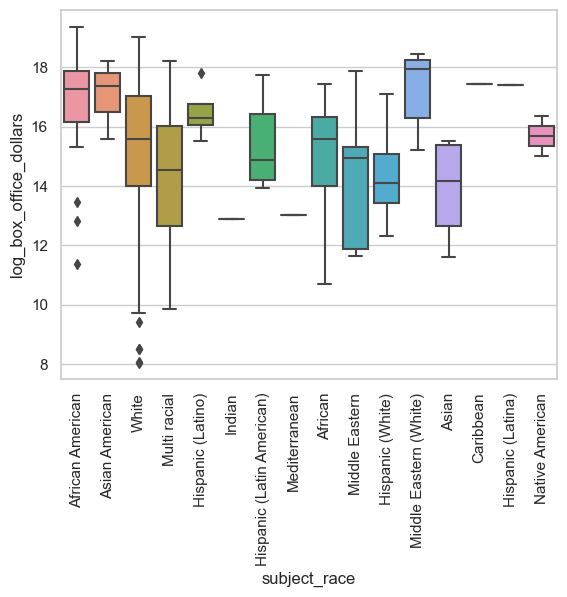

In [69]:
sns.boxplot(x="subject_race", y="log_box_office_dollars", data=biopics)
plt.xticks(rotation=90)
plt.show()

Without getting too worred about the fact that the axes are unreadable, it looks like
there are some differences between the different groups.  But are they real?

Let's start with an ANOVA:

In [70]:
box_office_dollars_lm = ols(
    "log_box_office_dollars ~ subject_race", data=biopics
).fit()
table = sm.stats.anova_lm(
    box_office_dollars_lm, typ=2
)  # Type 2 ANOVA DataFrame: no interaction effect
table

,sum_sq,df,F,PR(>F)
subject_race,182.728250,15.0,2.566995,0.001263
Residual,1428.419809,301.0,NaN,NaN


In [71]:
res = smf.ols("log_box_office_dollars ~ subject_race", biopics).fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     log_box_office_dollars   R-squared:                       0.113
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     2.567
Date:                    Thu, 28 Sep 2023   Prob (F-statistic):            0.00126
Time:                            15:35:43   Log-Likelihood:                -688.41
No. Observations:                     317   AIC:                             1409.
Df Residuals:                         301   BIC:                             1469.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

### Q11: Is there a statistically significant difference?

Yes, The results of the ANOVA show that there is a statistically signifigant difference between atleast 2 of the groups

Let's apply Tukey's HSD using the same model and see what we get.

### Q12: Write code to use Tukey's HSD test on the subject_race variable and interpret the results.

In [74]:
biopics.dropna(subset=["subject_race"], inplace=True)

In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

res2 = pairwise_tukeyhsd(
    biopics["log_box_office_dollars"], biopics["subject_race"]
)
res2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
African,African American,1.9884,0.7096,-1.1616,5.1384,False
African,Asian,-1.0387,1.0,-5.7568,3.6794,False
African,Asian American,2.1526,0.9884,-3.0419,7.347,False
African,Caribbean,2.517,0.9995,-5.5302,10.5642,False
African,Hispanic (Latin American),0.4535,1.0,-3.2561,4.1631,False
African,Hispanic (Latina),2.4782,0.9996,-5.569,10.5254,False
African,Hispanic (Latino),1.5807,0.9988,-3.1374,6.2988,False
African,Hispanic (White),-0.4918,1.0,-5.2099,4.2263,False
African,Indian,-2.0048,1.0,-10.052,6.0424,False
African,Mediterranean,-1.896,1.0,-9.9432,6.1512,False


Interpret your results

### Exercise: Putting our ideas together

Download the chocolate bars rating dataset from https://www.kaggle.com/rtatman/chocolate-bar-ratings.

Use the data to answer the following questions:
1. Is there a statistically significant difference in the average rating of chocolate bars from different countries (use the country of manufacture)?  If yes, which countries are different from each other?
2. Explore other variables in the dataset.  Is there anything else interesting you can find?

Use as many code and markdown cells as you need to answer the questions.

# <font color="green">END OF NOTEBOOK</font>
## Remember to submit HTML and IPYNB files via Canvas.